In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/cpu_172.csv')

In [65]:
m, n = data.shape[0], data.shape[1]
noise_data = data.copy()
num = 3

length = 2

rand_col = [np.random.randint(0,n) for i in range(num)]
rand_row = [np.random.randint(0,m) for i in range(num)]

std = [data[col].std() for col in data.columns]
noise_pos = {}
for i in range(num):
    row, col = rand_row[i], rand_col[i]
    noise_pos[i] = [row, noise_data.columns[col]]
    print(row, col)
    noise_data.loc[row, noise_data.columns[col:col+length]] += 0.5  #5*std[col]

6 266
113 817
130 114


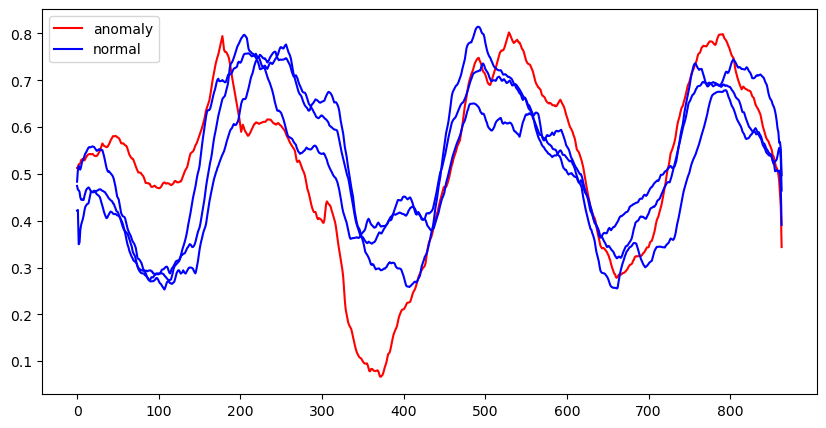

In [34]:
plt.figure(figsize=(10,5))
plt.plot(data.iloc[60], color='red', label='anomaly')
plt.plot(data.iloc[7], color='blue', label='normal')
plt.plot(data.iloc[8], color='blue')
plt.plot(data.iloc[12], color='blue')
plt.xticks(np.arange(0,864,100))
plt.legend()
plt.savefig('my_plot.jpg', dpi=150)
plt.show()

In [33]:
noise_data.to_csv('datasets/noise_data.csv')

In [69]:
ano_index_123 = [5, 10, 27, 35, 36, 63, 97, 76, 21, 86]
ano_index_864 = [11, 51, 60, 71, 89, 106, 123, 144, 147, 158]

In [67]:
label = np.ones(m)

In [70]:
label[ano_index_864] = -1

In [71]:
noise_data['label'] = label

In [77]:
noise_data.loc[11]

0        0.226179
1        0.263148
2        0.279373
3        0.307819
4        0.345016
           ...   
860      0.566673
861      0.568111
862      0.552638
863      0.497356
label   -1.000000
Name: 11, Length: 865, dtype: float64

In [78]:
noise_data.to_csv('datasets/labeled_data_864.csv')

In [79]:
ano_data = noise_data.iloc[ano_index_864]

In [80]:
pure_data = data.drop(ano_index_864)

In [81]:
pure_data.to_csv('datasets/pure_864.csv')
ano_data.to_csv('datasets/ano_864.csv')